<a href="https://colab.research.google.com/github/SofiaQuiroga/Repositorio_Taller4_BDML/blob/main/Taller4_Red_Neuronal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style type="text/css">

.responsive {
 width: 100%;
 height: 25%;
}

.list-group-item.active, .list-group-item.active:focus, .list-group-item.active:hover {
    z-index: 2;
    color: #fff;
    background-color: #1B175E;
    border-color: #337ab7;
}
h1, h2, h3, h4 {
    color: #000002;
    background-color: #1B175E;
    background-image:
      linear-gradient(to right,
       #fff, #ffff00
     );

}

h1, h2, h3, h4, p {
    color: #000002;
}

a {
    color: #1B175E;
}
</style>


In [231]:
rm(list = ls())


In [232]:
install.packages('keras')
library(keras)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Modelo
Vamos a crear una red neuronal que solo tenga una hidden layer. Vamos a usar la siguiente regla del pulgar para escoger el número de neuronas:
$$N_h=\frac{N_s}{\alpha\cdot(N_i+N_o)}$$
En donde:
- $N_i:$ Es el número de las neuronas inputs (número de columnas).
- $N_o:$ Número de neuronas en la capa de salida (número de categorías posibles).
- $N_s:$ Número de observaciones.
- $\alpha:$ Factor arbitrario entre 2 y 10.

Se pueden crear n capas ocultas 

Tenemos la regla del pulgar que dice el estimado de más o menos cuantos nodos se deberían usar en una capa oculta.


In [134]:
# Importamos data, data_clean, tf_idf, tf_idf_reducido
# https://github.com/ignaciomsarmiento/datasets/raw/main/datos_para_modelar.RData
load("train_clean.RData")

In [135]:
sum(is.na(train_clean$name)) # data clean, mirar si tenemos datos faltantes

[1] 0

In [136]:
table(train_clean$name)


Lopez Petro Uribe 
 3468  2873  3000 

In [137]:
library(dplyr)

In [138]:
train_clean <- train_clean %>% mutate(name = factor(name, levels = c("Lopez", "Petro", "Uribe"), labels = c(1, 2, 3)))


In [139]:
head(train_clean,10)

id,name,texto
<chr>,<fct>,<chr>
0002fd5a5cc196257335c0d7,1,manana feria santamario show arbol abundancia ir invito ir disfrutar familiar amigo evento preparado amor podar celebrar junto navidad
00049c5a2f555cfd13544693,3,amenazar asesinar asesinar columnista emerson grajal
0005c20695e7b3a5babff571,1,policia concentrarse seguridad ciudadana prevencion delito captura delincuente desarticulacion banda criminal bogota necesitar policia distraer tema margen prioridad
0005f46356c00cc4f5702f01,1,iniciar mesa tecnico presidente ratifico gobierno pondria recurso adicional caso importante aclarar aclarar ra linea construccion contrato vigente colombiano obra ejecucion seguira
000ba279c4a0ff679d8d3fdc,3,elevado costo energiar europar
0014838239be8f5311356c37,3,quema vehiculo extender suroeste antioquia
0016e2ea721674d194c84565,1,arma poderoso confianza ciudadana rescatar deber reformar policia desmilitarizarla viejo practica conflicto armado reclutir formar vigile policia civilista dependa ministerio defensa fuero militar
002293cf41be87e10439d016,1,exterminio up huella fractura doloroso historia deber reconocer reconocer reconocer reparar reparar reparar repetir tanto amigo familia victima llorado padecido exterminio estigmar amor apoyo admiracion
003777a80693e94fbb146f12,2,avance educativo bogota responsabikidad alcalde alcaldesa acerca promedio ocder bogota hacerse


In [140]:
Y_train <- train_clean$name
Y_train <- to_categorical(Y_train) # convertir en variable categorica

In [141]:
head(Y_train,10)
dim(Y_train)
class(Y_train)

0,1,0,0
0,0,0,1
0,1,0,0
0,1,0,0
0,0,0,1
0,0,0,1
0,1,0,0
0,1,0,0
0,0,1,0
0,0,0,1


[1] 9341    4

[1] "matrix" "array"

In [142]:
load("tf_idf_train.RData")

In [143]:
X <- as.matrix(tf_idf_train) # matriz de frecuencias
class(X)

[1] "matrix" "array"

In [144]:
dim(X) 

[1]  9341 17020

In [145]:
columnas <- colSums(tf_idf_train) %>%
  data.frame() %>%
  arrange(desc(.)) %>%
  head(250) %>% # Dejar las 250 columnas de palabras más importantes
  rownames()

In [146]:
tf_idf_train_reducido <- tf_idf_train %>% 
  select(all_of(columnas))

In [147]:
X_train <- as.matrix(tf_idf_train_reducido)
dim(X_train)

[1] 9341  250

In [148]:
#X_train <- as.matrix(tf_idf_train)
dim(X_train)

[1] 9341  250

In [149]:
set.seed(3312)

n_h = nrow(X_train)/(2*(ncol(X_train) + 3)) # formula anterior de la regla del pulgar
n_h



[1] 18.46047

In [230]:
##Crear modelo. Dar en orden las capas de quiero
model1 <- keras_model_sequential() 

model1 %>% 
  layer_dense(units = 800, activation = 'relu', input_shape = ncol(X_train)) %>% # capa de entrada, con función de activación 
  layer_dropout(rate = 0.5) %>% # capa interna, aleatoraimente elimina algunas de los nodos en cada corrida para evitar overfitting. rate es el % de nodos que quiero se eliminen en cada corrida
  layer_dense(units = 4, activation = 'softmax') # capa de salida
summary(model1)

  # units corresponde al valor de cateogrias que se quiere clasificar

# Arquitectura del modelo
model1 %>% compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy', # minimizar funcion de perdida
  metrics = c('CategoricalAccuracy') 
)

ERROR: ignored

In [192]:
history <- model1 %>% 
  fit(
    X_train, Y_train, # entrenar el modelo
    epochs = 400, # aprende 2 veces dentro de los baches de epoca
    batch_size = 2^8, #tamaño de datos que quiero que aprende dentro del tamaño del bache
    validation_split = 0.2 # set datos de entrenamiento para validar los parámetros
  )

#guarda lo que pasa en cada momento del tiempo

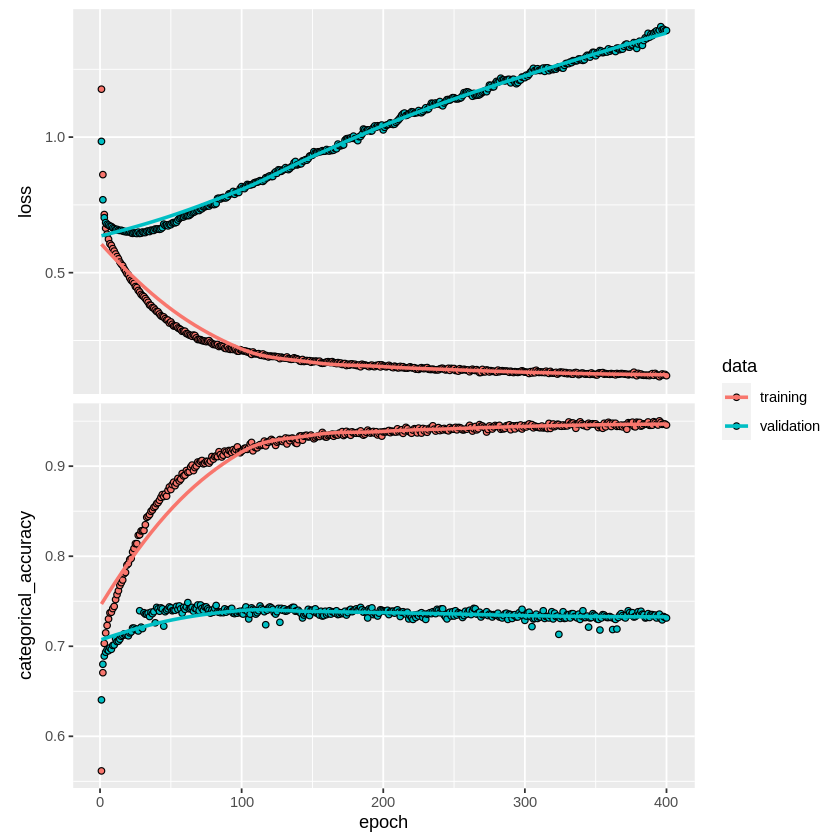

In [193]:
plot(history)

In [225]:
load("tf_idf_test.RData")

In [226]:
columnas <- colSums(tf_idf_test) %>%
  data.frame() %>%
  arrange(desc(.)) %>%
  head(250) %>% # Dejar las 250 columnas de palabras más importantes
  rownames()

In [227]:
tf_idf_test_reducido <- tf_idf_test %>% 
  select(all_of(columnas))

In [228]:
X_test <- as.matrix(tf_idf_test_reducido)
dim(X_test)

[1] 1499  250

In [229]:
y_hat <- model1 %>% predict(X_test) %>% k_argmax()
head(y_hat)

ERROR: ignored

In [199]:
prediccion <- factor(as.numeric(y_hat), levels = 1:3, labels = c("Lopez", "Petro", "Uribe"))
head(prediccion,100)

[1] Petro Petro Petro Petro Lopez Uribe Uribe Lopez Lopez Lopez Petro Lopez
 [13] Uribe Lopez Uribe Petro Petro Petro Petro Uribe Uribe Petro Petro Petro
 [25] Petro Uribe Petro Uribe Petro Petro Petro Petro Uribe Lopez Lopez Lopez
 [37] Uribe Lopez Uribe Petro Uribe Petro Petro Petro Lopez Lopez Petro Uribe
 [49] Uribe Petro Uribe Uribe Lopez Lopez Petro Uribe Lopez Lopez Lopez Lopez
 [61] Uribe Lopez Uribe Lopez Petro Uribe Lopez Uribe Uribe Uribe Petro Petro
 [73] Uribe Uribe Petro Uribe Petro Lopez Lopez Lopez Uribe Lopez Petro Lopez
 [85] Lopez Lopez Lopez Uribe Petro Lopez Petro Uribe Uribe Uribe Lopez Uribe
 [97] Lopez Petro Petro Uribe
Levels: Lopez Petro Uribe

In [223]:
load("test_clean.RData")

In [224]:
resultado <- data.frame(test_clean$id, prediccion)
head(resultado,10)

ERROR: ignored

In [211]:
names(resultado)[1] <- "id"
names(resultado)[2] <- "name"
head(resultado,10)

,id,name
,<chr>,<fct>
1,0004d31c290018d960ea1b61,Petro
2,001387a7e556a17e9af9e684,Petro
3,0017570ee84b80e1c3e10218,Petro
4,0036f3d867393f8effa12b66,Petro
5,004508bf8e624f9656fdf9ec,Lopez
6,0052da408e75b7813dbcc512,Uribe
7,007bdeb03c21d2f9d469ddad,Uribe
8,0082edc86dfa7e2d6e95bd4d,Lopez
9,0087a99cd90e95c19e3b037b,Lopez


In [212]:
# Neurona faltante
test <- read.csv("test.csv")
tweet_faltante <- setdiff(test$id, resultado$id)
tweet_faltante

[1] "cb9ac947c675464803342fc9"

In [221]:
y_hat_faltante <- data.frame(id = "cb9ac947c675464803342fc9", name = "Lopez")
resultado <- rbind(resultado, y_hat_faltante)

ERROR: ignored

In [215]:
write.csv(resultado, 'Red_Neuronal2.csv',row.names=FALSE)

In [220]:
table(resultado$name)

ERROR: ignored